In [6]:
import sys
!conda install --yes --prefix {sys.prefix} plotly

^C


In [67]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))

In [68]:
dff = pd.read_csv('c.csv')
df = dff.replace(np.nan,0)
df.head()

,id,name,fullName,password,idProfile,isResource,idTeam,idRole,isContact,initials,...,crypto,cookieHash,passwordChangeDate,apiKey,profile,profileCode,role,role_descrip,team,idResource
0,1,Resource 1,Resource 1,12345,1,0,0,0,0,0,...,sha256,0,2020-08-11 00:00:00,dd740454184b5f2aa2c21c293853cfeb,profileAdministrator,ADM,0,0,0,0.0
1,2,Resource 2,Resource 2,12345,5,0,0,0,0,0,...,0,0,2018-02-19 00:00:00,a758923aa8beca9b472422f815864ddd,profileGuest,G,0,0,0,0.0
2,3,Resource 3,Resource 3,12345,3,1,0,0,1,BK,...,sha256,0,2018-04-24 00:00:00,84308598f76cdf395e681cfac2d21140,profileProjectLeader,PL,0,0,0,0.0
3,4,Resource 4,Resource 4,12345,1,1,1,1,1,AM,...,sha256,0,2020-06-05 00:00:00,5c6637f47a8f347ebb8c52d27630f6ac,profileAdministrator,ADM,Manager,Leader/Manager of the project,Abacus Team,7.0
4,5,Resource 5,Resource 5,12345,1,1,0,0,1,EM,...,sha256,0,2020-07-09 00:00:00,d8b3c8a98f4ee4c6469dbd9e46579883,profileAdministrator,ADM,0,0,0,0.0


In [69]:
df.shape

(63, 21)

In [70]:
df.describe()

,id,password,idProfile,isResource,idTeam,idRole,isContact,idResource
count,63.000000,63.0,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,32.000000,12345.0,3.333333,0.936508,0.047619,0.253968,0.952381,0.333333
std,18.330303,0.0,1.218142,0.245805,0.214669,0.717708,0.214669,1.502686
min,1.000000,12345.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.500000,12345.0,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,32.000000,12345.0,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,47.500000,12345.0,4.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,63.000000,12345.0,6.000000,1.000000,1.000000,4.000000,1.000000,7.000000


In [71]:
df.dtypes

id                      int64
name                   object
fullName               object
password                int64
idProfile               int64
isResource              int64
idTeam                  int64
idRole                  int64
isContact               int64
initials               object
salt                   object
crypto                 object
cookieHash             object
passwordChangeDate     object
apiKey                 object
profile                object
profileCode            object
role                   object
role_descrip           object
team                   object
idResource            float64
dtype: object

In [72]:
df.isnull().sum()

id                    0
name                  0
fullName              0
password              0
idProfile             0
isResource            0
idTeam                0
idRole                0
isContact             0
initials              0
salt                  0
crypto                0
cookieHash            0
passwordChangeDate    0
apiKey                0
profile               0
profileCode           0
role                  0
role_descrip          0
team                  0
idResource            0
dtype: int64

In [73]:
plt.style.use('fivethirtyeight')

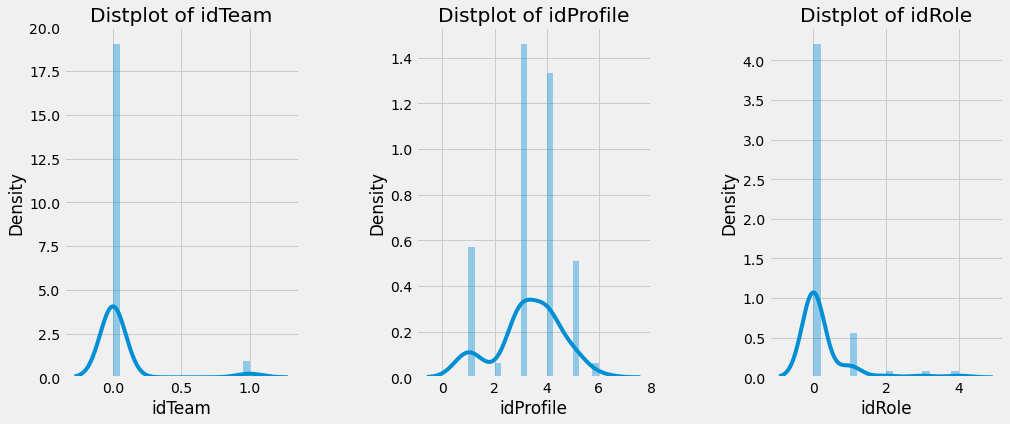

In [74]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['idTeam' , 'idProfile' , 'idRole']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

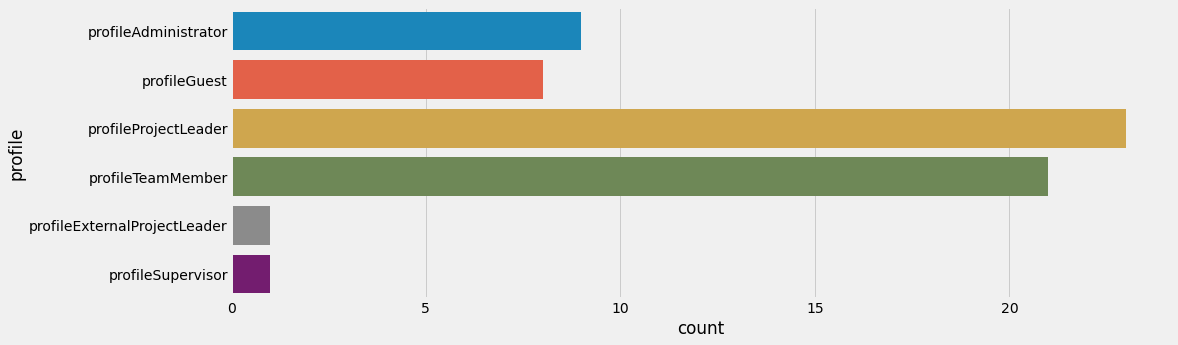

In [76]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'profile' , data = df)
plt.show()

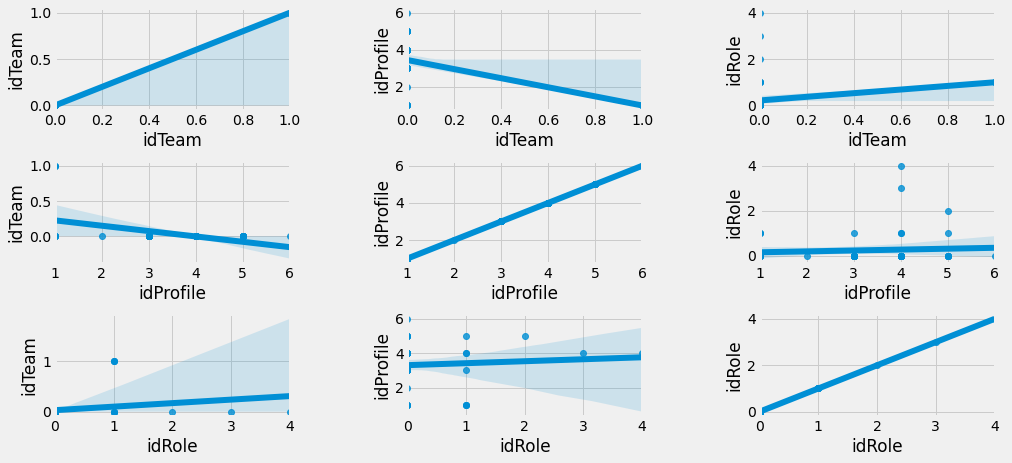

In [101]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['idTeam' , 'idProfile' , 'idRole']:
    for y in ['idTeam' , 'idProfile' , 'idRole']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

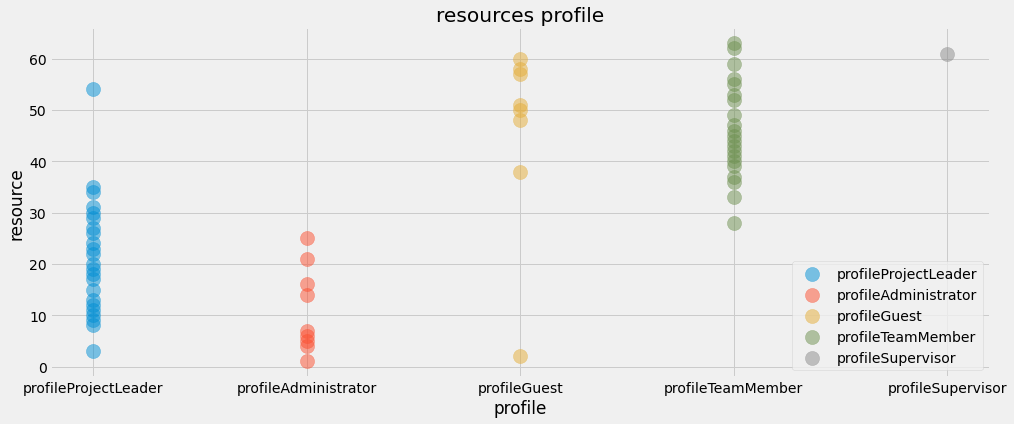

In [107]:
plt.figure(1 , figsize = (15 , 6))
for profile in ['profileProjectLeader' , 'profileAdministrator','profileGuest','profileTeamMember','profileSupervisor']:
    plt.scatter(x = 'profile' , y = 'id' , data = df[df['profile'] == profile] ,
                s = 200 , alpha = 0.5 , label = profile)
plt.xlabel('profile'), plt.ylabel('resource') 
plt.title('resources profile')
plt.legend()
plt.show()

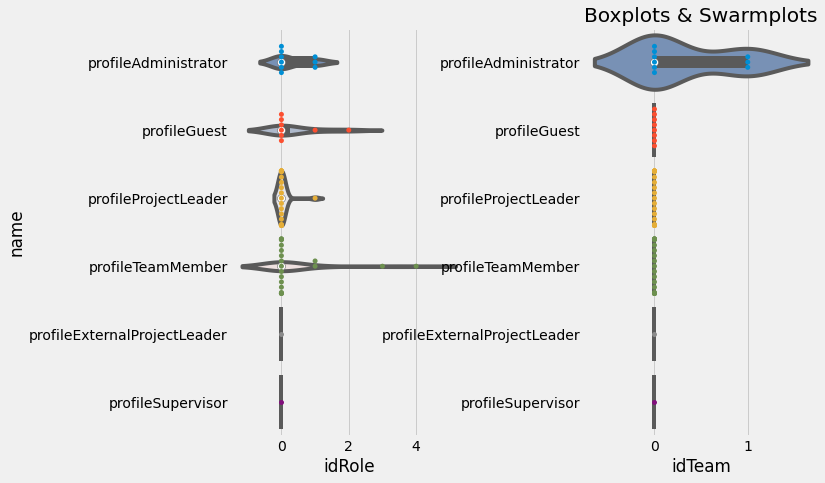

In [91]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['idRole', 'idTeam']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'profile' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'profile' , data = df)
    plt.ylabel('name' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

In [62]:
'''Profile and Role'''
X1 = df[['idProfile' , 'idRole']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

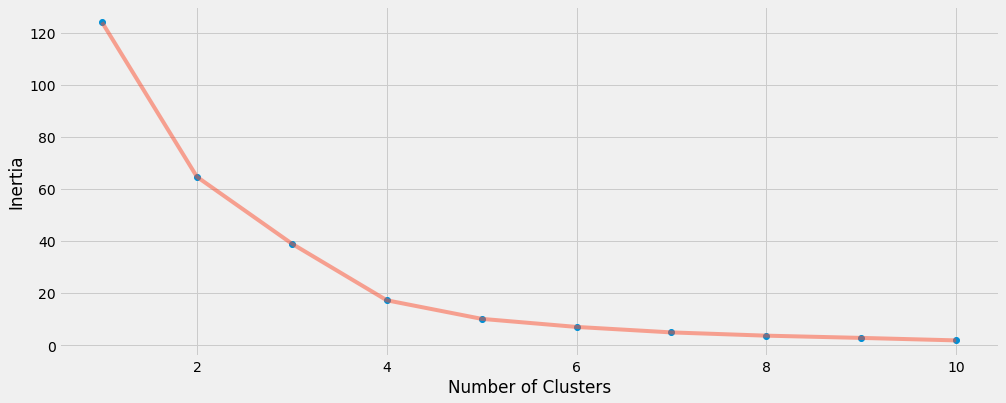

In [63]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [64]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [65]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

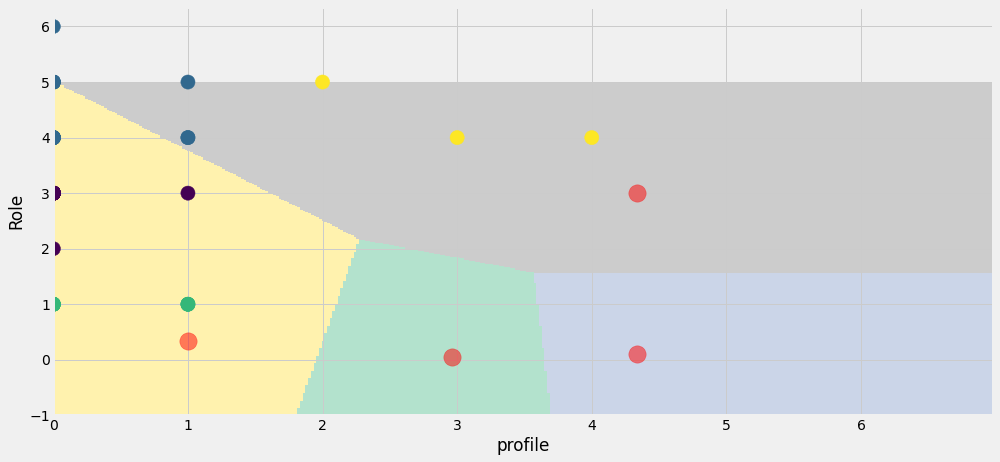

In [99]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'idRole' ,y = 'idProfile' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Role') , plt.xlabel('profile')
plt.show()

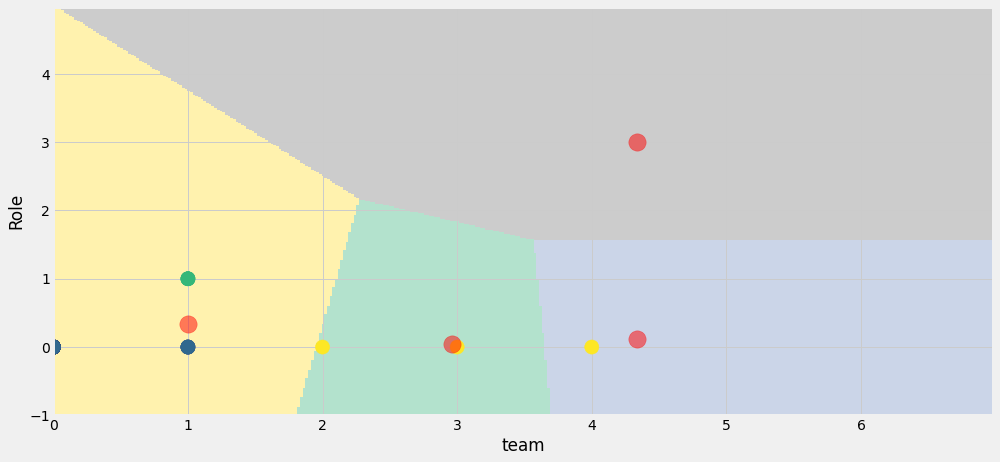

In [108]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'idRole' ,y = 'idTeam' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Role') , plt.xlabel('team')
plt.show()

In [112]:
X3 = df[['idProfile' , 'idRole' ,'idTeam']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

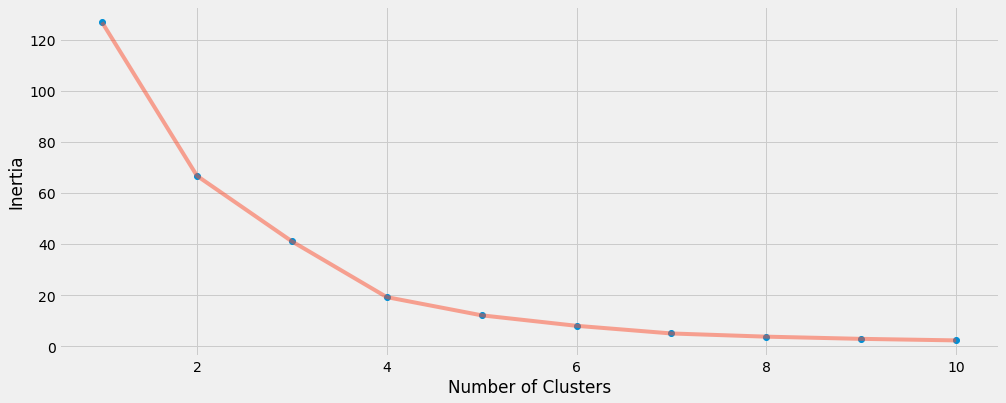

In [113]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [114]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [115]:
df['label3'] =  labels3
trace1 = go.Scatter3d(
    x= df['profile'],
    y= df['role'],
    z= df['team'],
    mode='markers',
     marker=dict(
        color = df['label3'], 
        size= 20,
        line=dict(
            color= df['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'profile'),
            yaxis = dict(title  = 'role'),
            zaxis = dict(title  = 'team')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)